## 1 Software/Library Installation 
Scikit-learn is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including neural networks, support vector machines, random forests, gradient boosting, k-means and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.

Beyond this, we used Imbalanced-Learn to try to create better training sets, Seaborn and Matplotlib to visualize our data, and Pandas to read and manipulate data.

•	Python Website, https://www.python.org/   
•	Anaconda Website, https://www.anaconda.com/   
•	Project Jupyter Website, https://jupyter.org/   
•	NumPy Website, https://numpy.org/   
•	SciPy Website, https://www.scipy.org/  
•	Pandas Website, https://pandas.pydata.org/  
•	Scikit-Learn Website, https://scikit-learn.org/  
•	MatPlotLib Website, https://matplotlib.org/  
•	Seaborn Website, https://seaborn.pydata.org/  
•	Imbalanced-Learn Website,https://imbalanced-learn.org/

•   Graphviz Website: https://graphviz.org/	




In [1]:
import pandas
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTENC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
import sklearn.tree as tree
import graphviz 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from imblearn.pipeline import Pipeline
from sklearn.ensemble import ExtraTreesClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_selection import SelectPercentile
from collections import Counter

### 2. Extended Steel Plate Defect data set – Data Preprocessing and Simple Classification
The original Steel Plate Defect data set is a multivariate data set provided by the Semeion institute, in Italy. The data set studied in this notebook is an extension of that data set, with 1940 new rows, provided by the UC Irvine Machine Learning Repository.

The data set consists of samples of multiple steel plates, with multiple features describing the properties of the defect, such as its position and area. In this assignment, we will use supervised learning machine learning algorithms to analyze the dataset and train a model capable of classifying the defects.

Most features are continuous, with floating point values, but there are some categorical features (TypeOfSteel_A300/TypeOfSteel_A400) and some integer features (the various geometric indices).

In [2]:
steel_data = pandas.read_csv('extended_steel_train.csv')
pandas.set_option('display.max_columns', None)  # or 1000
pandas.set_option('display.max_rows', None)  # or 1000
steel_data.head()
steel_data.describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scratch,Stains,Dirtiness,Bumps,Other_Faults
count,21159.000000,21159.000000,2.115900e+04,2.115900e+04,21159.000000,21159.000000,21159.000000,2.115900e+04,21159.000000,21159.000000,21159.000000,21159.000000,21159.000000,21159.000000,21159.000000,21159.000000,21159.000000,21159.000000,21159.000000,21159.000000,21159.000000,21159.000000,21159.000000,21159.000000,21159.000000,21159.000000,21159.000000,21159.000000,21159.000000,21159.000000,21159.000000,21159.000000,21159.000000,21159.000000
mean,697.161019,741.424878,1.831569e+06,1.828712e+06,1703.308710,97.144525,65.853490,1.931816e+05,84.785009,128.790207,1459.322511,0.402429,0.596673,76.444539,0.351007,0.409766,0.574195,0.030863,0.614369,0.829976,0.590397,2.475212,1.314798,1.390966,0.100924,-0.137725,0.573142,0.076705,0.063330,0.180680,0.030247,0.025521,0.244104,0.341746
std,532.048083,501.149392,1.892936e+06,1.886280e+06,3884.880106,192.513769,161.191305,4.489439e+05,29.121968,14.672587,145.469705,0.490399,0.490577,54.043713,0.317311,0.125406,0.260511,0.048494,0.224388,0.222278,0.482092,0.763238,0.469165,0.410280,0.488912,0.123236,0.332911,0.266129,0.243561,0.384762,0.171271,0.157705,0.429565,0.474306
min,0.000000,4.000000,6.712000e+03,6.724000e+03,2.000000,2.000000,1.000000,2.500000e+02,0.000000,37.000000,1227.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.008300,0.001500,0.014400,0.048400,0.000000,0.301000,0.301000,0.000000,-0.991000,-0.998900,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50.000000,214.000000,6.394900e+05,6.395070e+05,88.000000,15.000000,14.000000,9.778000e+03,68.000000,124.000000,1358.000000,0.000000,0.000000,40.000000,0.059100,0.317500,0.375000,0.006600,0.450000,0.650000,0.000000,1.944500,1.000000,1.079200,-0.272700,-0.192600,0.253200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,754.000000,772.000000,1.378585e+06,1.378465e+06,169.000000,25.000000,24.000000,1.840200e+04,90.000000,127.000000,1364.000000,0.000000,1.000000,69.000000,0.237100,0.413300,0.545400,0.009500,0.636400,0.961500,1.000000,2.227900,1.146100,1.322200,0.111100,-0.142600,0.472900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1145.000000,1161.000000,2.339627e+06,2.336588e+06,659.000000,67.000000,62.000000,6.841600e+04,105.000000,135.000000,1652.000000,1.000000,1.000000,80.000000,0.648800,0.495200,0.818200,0.019200,0.785700,1.000000,1.000000,2.818900,1.431400,1.716000,0.526300,-0.082800,0.999400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,10449.000000,18152.000000,1.159141e+07,203.000000,253.000000,1794.000000,1.000000,1.000000,300.000000,0.995200,0.943900,1.000000,0.875900,1.000000,1.000000,1.000000,5.183700,3.074100,4.258700,0.991700,0.642100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Data processing

As we can see, there are 21 rows that indicate more than one type of defect. This could be troublesome for labeling the rows.

However, when printing out these rows, we can see that most of them are K_Scratch and Other_Faults, and all of them involve K_Scratch.

In [3]:
all_target_labels = ['Pastry', 'Z_Scratch', 'K_Scratch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']
target_values = steel_data[all_target_labels]

target_values.sum(axis=1).value_counts()
filtered_by_2 = steel_data[target_values.sum(axis=1) >= 2]
print(filtered_by_2[all_target_labels])

       Pastry  Z_Scratch  K_Scratch  Stains  Dirtiness  Bumps  Other_Faults
634         0          0          1       0          0      0             1
752         0          0          1       0          0      0             1
3572        0          0          1       0          0      1             0
4416        0          0          1       0          0      0             1
4530        0          0          1       0          0      0             1
4664        0          0          1       0          0      0             1
6448        0          0          1       0          0      0             1
7589        0          0          1       0          0      0             1
8075        0          0          1       0          0      0             1
8538        0          0          1       0          0      0             1
9103        0          0          1       0          0      0             1
9388        0          0          1       0          0      0             1
10225       

- Firstly, although this has no impact on results, we fixed an apparent typo in one of the target rows, which was labeled 'K_Scatch' instead of 'K_Scratch'.
- We merged the target columns into a single column used for labeling, called 'Faults'.
- Taking into account our previous observations, we collapsed the defects of rows containing more than one defect into K_Scratch.
- We only have 2 types of steel and having an extra column encoding its other type is unecessary, so we removed that

In [4]:
#print(target_values.head(20))
#Func to merge the columns that have a certain fault set to 1 and concatenate them by ',' returning them to a new column.
import numpy as np
def get_faults(row):
    faults = "No_Faults"
    counter = 0
    for label in all_target_labels:
        if row[label] == 1:
            counter += 1
            faults = label 
    return faults if counter < 2 else "K_Scratch"
def get_steel_type(row):
    if row['TypeOfSteel_A300'] == 1:
        return 'A300'
    else:
        return 'A400'
###steel_data['Fault_count'] = steel_data[all_target_labels].sum(axis=1)
##steel_data = steel_data[steel_data['Fault_count'] < 2]
##steel_data.drop(columns='Fault_count', inplace=True)

## steel_data = steel_data[steel_data['Other_Faults'] == 0] #drops the rows with Other_Faults set to 1
steel_data = steel_data[(steel_data[all_target_labels] == 1).any(axis=1)]
steel_data['Faults']=target_values.apply(get_faults, axis=1)
target = steel_data['Faults']


steel_data = steel_data.drop(columns='TypeOfSteel_A400') #drops the TypeOfSteel_A400 column
steel_data_no_others = steel_data[steel_data['Faults'] != 'Other_Faults'] #drops the rows with Other_Faults set to 1

#print(steel_data[steel_data['Faults'].str.contains(',')])
#Merge steel type columns (not needed?)
#labels = ['TypeOfSteel_A300','TypeOfSteel_A400']
#target = steel_data[labels]
#steel_data['TypeOfSteel'] = target.apply(get_steel_type, axis=1)
#print(steel_data['TypeOfSteel'].head(20))
#steel_data = steel_data.drop(['Pastry', 'Z_Scratch', 'K_Scratch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults'],axis=1))

#### Visualization of the dataset
As we can see, they are really overlapped, specially "Bumps" and "Other_Faults", they are similar in almost every aspect and feature.

These plots show a lot of overlap between the different classes. The most represented classes, "Other_Faults" and "Bumps", have very diverse values that overlap with the rest. In most aspects, "K_Scratch" is the feature that stands out as having the most "unique" distributions.

In [5]:
# This line tells the notebook to show plots inside of the notebook
%matplotlib inline




location_features = ['X_Minimum','X_Maximum','Y_Minimum','Y_Maximum','Faults']
size_features = ['Pixels_Areas','X_Perimeter','Y_Perimeter','Faults']
luminosity_features = ['Sum_of_Luminosity','Minimum_of_Luminosity','Maximum_of_Luminosity','Faults']
material_features = ['Steel_Plate_Thickness','Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index', 'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index','Faults']
logaritmit_features = ['LogOfAreas','Log_X_Index', 'Log_Y_Index','Faults']
statistical_features = ['Orientation_Index','Luminosity_Index','SigmoidOfAreas','Faults']
print("Bumps entries: ")
print(steel_data[steel_data['Faults'].str.contains('Bumps')]['Faults'].count())
print("Dirtiness entries: ")
print(steel_data[steel_data['Faults'].str.contains('Dirtiness')]['Faults'].count())
print("K_Scratch entries: ")
print(steel_data[steel_data['Faults'].str.contains('K_Scratch')]['Faults'].count())
print("Other_Faults entries: ")
print(steel_data[steel_data['Faults'].str.contains('Other_Faults')]['Faults'].count())
print("Pastry entries: ")
print(steel_data[steel_data['Faults'].str.contains('Pastry')]['Faults'].count())
print("Stains entries: ")
print(steel_data[steel_data['Faults'].str.contains('Stains')]['Faults'].count())
print("Z_Scratch entries: ")
print(steel_data[steel_data['Faults'].str.contains('Z_Scratch')]['Faults'].count())
""" sb.pairplot(steel_data[location_features],hue='Faults')
plt.show()
sb.pairplot(steel_data[size_features],hue='Faults')
plt.show()
sb.pairplot(steel_data[luminosity_features],hue='Faults')
plt.show()
sb.pairplot(steel_data[material_features],hue='Faults')
plt.show()
sb.pairplot(steel_data[logaritmit_features],hue='Faults')
plt.show()
sb.pairplot(steel_data[statistical_features],hue='Faults')
plt.show()
 """


Bumps entries: 
5163
Dirtiness entries: 
540
K_Scratch entries: 
3823
Other_Faults entries: 
7213
Pastry entries: 
1622
Stains entries: 
640
Z_Scratch entries: 
1340


" sb.pairplot(steel_data[location_features],hue='Faults')\nplt.show()\nsb.pairplot(steel_data[size_features],hue='Faults')\nplt.show()\nsb.pairplot(steel_data[luminosity_features],hue='Faults')\nplt.show()\nsb.pairplot(steel_data[material_features],hue='Faults')\nplt.show()\nsb.pairplot(steel_data[logaritmit_features],hue='Faults')\nplt.show()\nsb.pairplot(steel_data[statistical_features],hue='Faults')\nplt.show()\n "

To try to solve the outlier problem, we used a QuantileTransformer to make our models more robust with regards to them.

In [5]:

transformer = QuantileTransformer()

numerical_features = ['X_Minimum', 'X_Maximum', 'Pixels_Areas',
               'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
               'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer','Steel_Plate_Thickness',
               'LogOfAreas','SigmoidOfAreas']

numerical_values = steel_data[numerical_features]
steel_data_no_outliers = steel_data.copy()

steel_data[numerical_features] = transformer.fit_transform(numerical_values, steel_data_no_outliers['Faults'])


#### Classification section

In this following cell, we prepared the features and the data we wanted to classify:

In [6]:
#iris_data_clean = pandas.read_csv('iris-data-clean.csv')

# We're using all four measurements as inputs
# Note that scikit-learn expects each entry to be a list of values, e.g.,
# [ [val1, val2, val3],
#   [val1, val2, val3],
#   ... ]
# such that our input data set is represented as a list of lists

# We can extract the data in this format from pandas like this:
#all_inputs = iris_data_clean[['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm']].values
features = ['X_Minimum', 'X_Maximum', 'Pixels_Areas',
               'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
               'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
               'TypeOfSteel_A300', 'Steel_Plate_Thickness',
               'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
               'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
               'Log_X_Index', 'Log_Y_Index', 'Orientation_Index',
               'SigmoidOfAreas']
steel_inputs = steel_data[features].values
steel_inputs_no_others = steel_data_no_others[features].values

# Similarly, we can extract the class labels
#all_labels = iris_data_clean['class'].values
steel_labels = steel_data['Faults'].values
steel_labels_no_others = steel_data_no_others['Faults'].values

# inputs and labels for the no outliers dataset
steel_data_no_outliers_inputs = steel_data_no_outliers[features].values
steel_data_no_outliers_labels = steel_data_no_outliers['Faults'].values
# Make sure that you don't mix up the order of the entries
# all_inputs[5] inputs should correspond to the class in all_labels[5]


#### Splitting and sampling the dataset
Now our data is ready to be split and sampled.
Firstly we'll sample the usual way:

In [8]:


(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(steel_inputs, steel_labels, test_size=0.25, random_state=1)

Then, as we have the class imbalance problem in this dataset, we'll sample using **SMOTE-NC** in order to select a subset that's more balanced.

**SMOTE-NC** is used for dataset containing numerical and categorical features:

In [9]:


(training_inputs_stratified,
 testing_inputs_stratified,
 training_classes_stratified,
 testing_classes_stratified) = train_test_split(steel_inputs, steel_labels,stratify=steel_labels, test_size=0.25)

smote = SMOTENC(categorical_features=[9])
training_inputs_op, training_classes_op = smote.fit_resample(training_inputs_stratified, training_classes_stratified)

##### The first model that we used was the **DecisionTree**
After training the model and evaluating its performance:

0.5086511993708218
              precision    recall  f1-score   support

       Bumps       0.43      0.44      0.44      1315
   Dirtiness       0.21      0.22      0.22       122
   K_Scratch       0.84      0.83      0.83       962
Other_Faults       0.45      0.45      0.45      1797
      Pastry       0.30      0.28      0.29       421
      Stains       0.60      0.60      0.60       154
   Z_Scratch       0.49      0.50      0.50       315

    accuracy                           0.51      5086
   macro avg       0.48      0.48      0.48      5086
weighted avg       0.51      0.51      0.51      5086



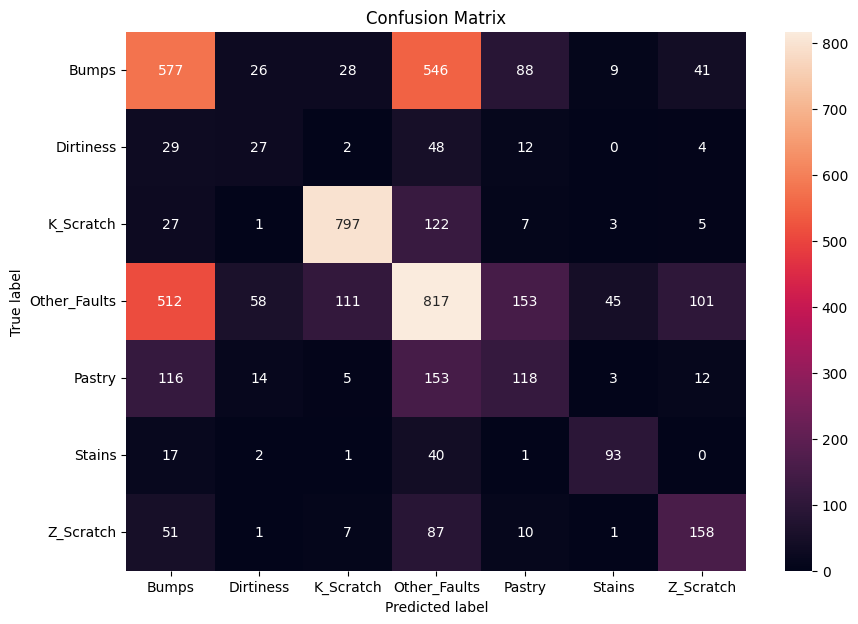

In [10]:



# Create the classifier
# Your Code Here
decisionTree = DecisionTreeClassifier()

# Train the classifier on the training set
# Your Code Here
decisionTree.fit(training_inputs, training_classes)

# Validate the classifier on the testing set using classification accuracy
# Your Code Here
score = decisionTree.score(testing_inputs, testing_classes)
print(score)
class_pred = decisionTree.predict(testing_inputs)
cm = confusion_matrix(testing_classes, class_pred)
class_labels = np.unique(testing_classes)

report = classification_report(testing_classes, class_pred, target_names=class_labels)
print(report)
# Create a DataFrame from the confusion matrix for easier plotting
cm_df = pandas.DataFrame(cm, index=class_labels, columns=class_labels)

# Plot the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, fmt='g')
plt.title("Confusion Matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


The model achieves a poor 49% of classification accuracy because "Bumps" and "Other_Faults" are often confused by the model, just like we infered previously with other plotted graphs.
So we tested using feature engineering for many new features we tried to create to distinguish those:


In [11]:
def calculate_area(steel_data):
    x_range = steel_data['X_Maximum'] - steel_data['X_Minimum']
    y_range = steel_data['Y_Maximum'] - steel_data['Y_Minimum']  
    steel_data["XY_Area"] = x_range * y_range
    return steel_data

def calculate_range_XY(steel_data):
    steel_data["X_Range"] = abs(steel_data['X_Maximum'] - steel_data['X_Minimum'])
    steel_data["Y_Range"] = abs(steel_data['Y_Maximum'] - steel_data['Y_Minimum'])  
    return steel_data
def calculate_Size_Ratio(steel_data):
    steel_data["Size_Ratio"] = steel_data['Pixels_Areas'] / (steel_data['X_Perimeter'] + steel_data['Y_Perimeter'])
    return steel_data
def calculate_luminosity_range_feature(data):
    data['Luminosity_Range'] = (data['Maximum_of_Luminosity'] - data['Minimum_of_Luminosity'])
    return data


data1=calculate_range_XY(steel_data)

data2=calculate_area(steel_data)

data3=calculate_Size_Ratio(steel_data)

data4=calculate_luminosity_range_feature(steel_data)

data5=calculate_range_XY(steel_data)
data5=calculate_Size_Ratio(steel_data)
data5=calculate_luminosity_range_feature(steel_data)

datas = [data1,data2,data3,data4,data5]
new_features = ['X_Range','Y_Range','Size_Ratio','XY_Area','Luminosity_Range']
res_features = features + new_features
i = 1
for data in datas:
    
    values = data[res_features].values
    (training_inputs,
    testing_inputs,
    training_classes,
    testing_classes) = train_test_split(values, steel_labels, test_size=0.25, random_state=1)
    decisionTree.fit(training_inputs, training_classes)
    score = decisionTree.score(testing_inputs, testing_classes)
    print(score, "for feature engineering of ","data",i)
    i=i+1

0.5137632717263075 for feature engineering of  data 1
0.5145497443963822 for feature engineering of  data 2
0.511600471883602 for feature engineering of  data 3
0.5216279984270547 for feature engineering of  data 4
0.5098309083759339 for feature engineering of  data 5


The result wasn't very satisfactory after the new features.

##### We tried to use GridSearch to look for the best score according to the defined parameters in the bellow code:

In [12]:

decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': range(1, 10),
                  'max_features': range(1, len(features)),}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)
grid_search.fit(steel_inputs, steel_labels)


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'max_features': range(1, 23),
                         'splitter': ['best', 'random']})

In [13]:
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.592449126519923
Best parameters: {'criterion': 'entropy', 'max_depth': 9, 'max_features': 21, 'splitter': 'best'}


##### Visualization of the decision tree:
We used graphviz so we could display the tree created.

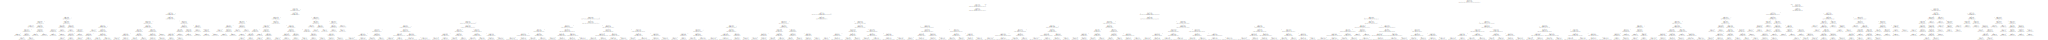

In [14]:

with open('steel.dot', 'w') as out_file:
    out_file = tree.export_graphviz(grid_search.best_estimator_, out_file=out_file)
with open('steel.dot','r') as f:
    dot_graph = f.read()
graph = graphviz.Source(dot_graph)
graph 

##### We then used the parameters to do the DecisionTree classification

In [15]:
temp_decision_tree_classifier = DecisionTreeClassifier(criterion=grid_search.best_params_['criterion'],max_depth=grid_search.best_params_['max_depth'],max_features=grid_search.best_params_['max_features'],splitter=grid_search.best_params_['splitter'])
temp_decision_tree_classifier.fit(training_inputs, training_classes)
score = temp_decision_tree_classifier.score(testing_inputs, testing_classes)
print(score)
class_pred = temp_decision_tree_classifier.predict(testing_inputs)
classification_rep = classification_report(testing_classes, class_pred, target_names=class_labels)
print(classification_rep)



0.5857255210381439
              precision    recall  f1-score   support

       Bumps       0.51      0.52      0.52      1315
   Dirtiness       0.54      0.11      0.19       122
   K_Scratch       0.87      0.91      0.89       962
Other_Faults       0.49      0.55      0.52      1797
      Pastry       0.41      0.15      0.22       421
      Stains       0.72      0.82      0.77       154
   Z_Scratch       0.61      0.72      0.66       315

    accuracy                           0.59      5086
   macro avg       0.59      0.54      0.54      5086
weighted avg       0.58      0.59      0.57      5086



##### We also checked the correlation between the attribues and the class:

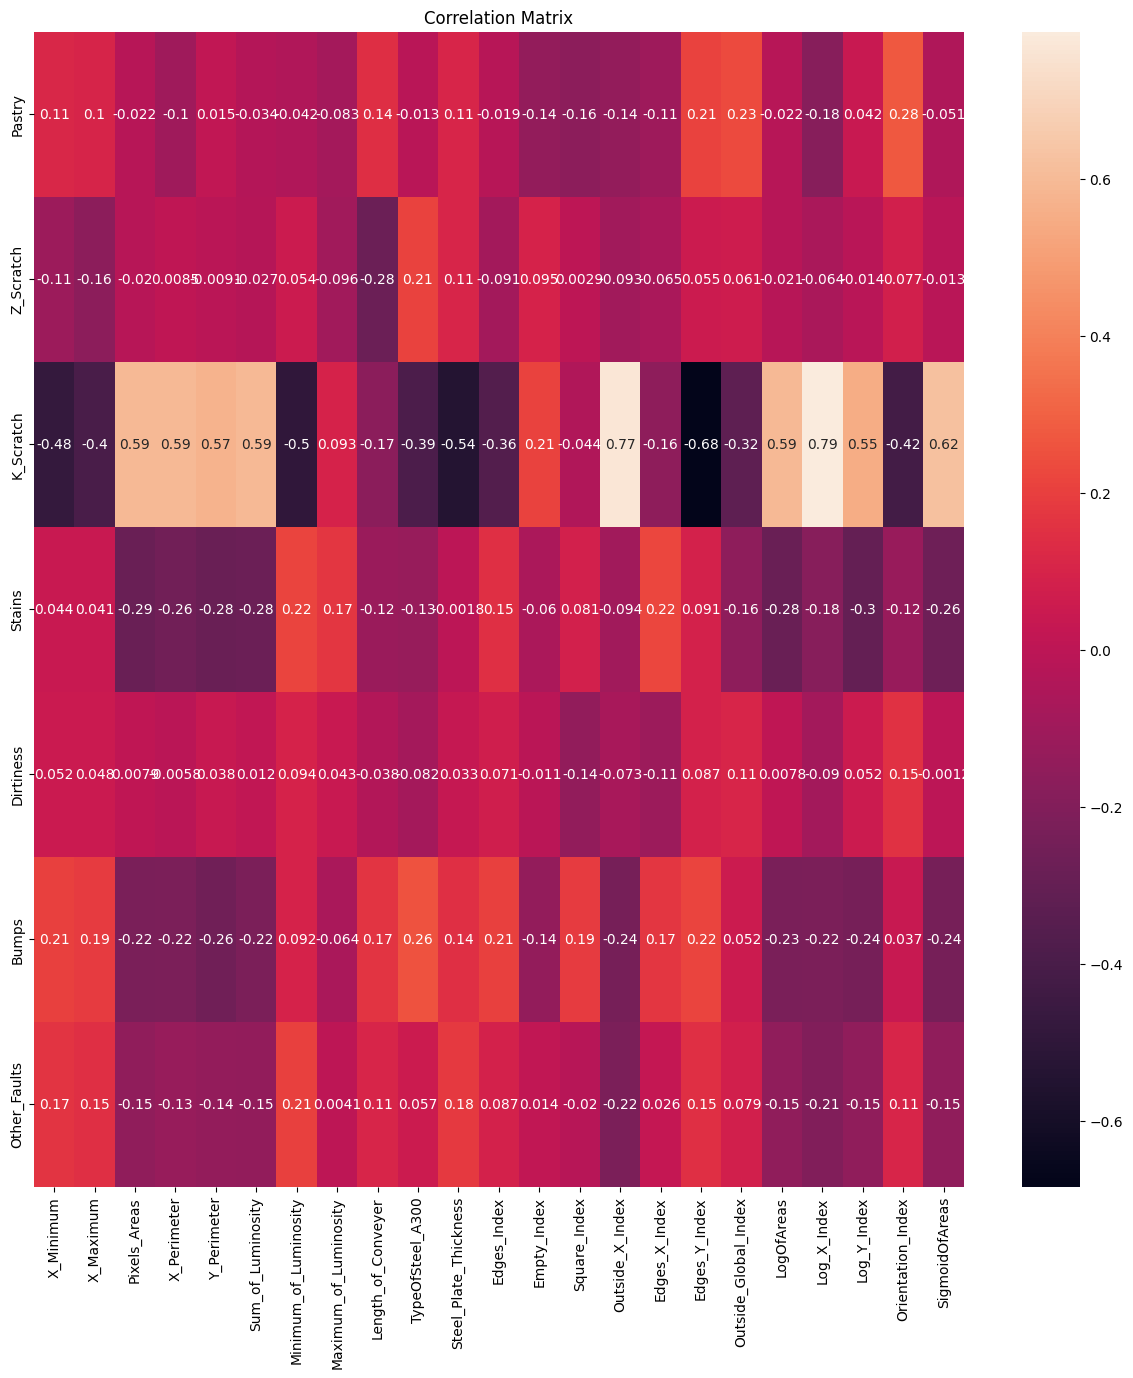

In [16]:
selected_data=steel_data[features+all_target_labels]
correlation_matrix = selected_data.corr()
correlation_matrix = correlation_matrix.loc[all_target_labels, features]


# Plot the heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matrix")
plt.show()

This is in accordance with our previous plots, in showing that "K_Scratch" is the class that is the most distinguishable from the rest. As for the other classes, there is little correlation with its features, which means that models that are reliant on these correlations will likely perform poorly.

#### Using the balanced subset (SMOTE) with **DecisionTree**

One major problem was that the classes weren't balanced enough because they differ much in size, plus the fact that the correlations to the features are low for the majority of the classes so the models can't identify the classes accurately.
To solve this issue, we imported **imbalaced-learn** for datasets that are imbalaced such our case, and we used SMOTE-NC in order to create a balanced subset of our dataset previously.

(array([ 2.,  2.,  2.,  9., 10., 10.,  7.,  5.,  2.,  1.]),
 array([0.4870232 , 0.48977586, 0.49252851, 0.49528116, 0.49803382,
        0.50078647, 0.50353913, 0.50629178, 0.50904444, 0.51179709,
        0.51454974]),
 <BarContainer object of 10 artists>)

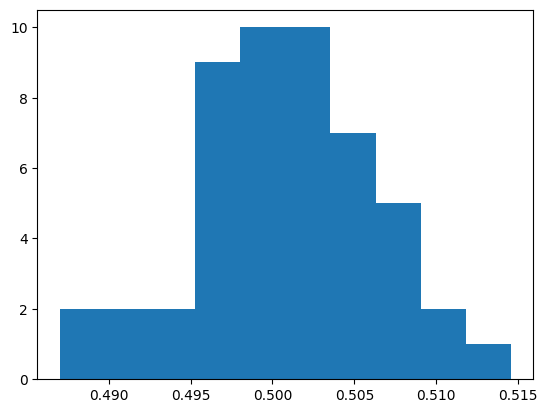

In [17]:
model_accuracies = []

for repetition in range(50):
    (training_inputs_str,
     testing_inputs_str,
     training_classes_str,
     testing_classes_str) = train_test_split(steel_inputs, steel_labels,stratify=steel_labels, test_size=0.25, random_state=1)
    training_inputs_optimized, training_classes_optimized = smote.fit_resample(training_inputs_str, training_classes_str)
    decisionTree.fit(training_inputs_optimized, training_classes_optimized)
    model_accuracies.append(decisionTree.score(testing_inputs_str, testing_classes_str))
    

plt.hist(model_accuracies)

#### We tried to implement another model for this problem, **K-NN**:

0.57589461266221
              precision    recall  f1-score   support

       Bumps       0.49      0.54      0.51      1315
   Dirtiness       0.45      0.20      0.27       122
   K_Scratch       0.89      0.91      0.90       962
Other_Faults       0.49      0.54      0.51      1797
      Pastry       0.43      0.14      0.21       421
      Stains       0.67      0.84      0.75       154
   Z_Scratch       0.60      0.52      0.56       315

    accuracy                           0.58      5086
   macro avg       0.57      0.53      0.53      5086
weighted avg       0.57      0.58      0.56      5086



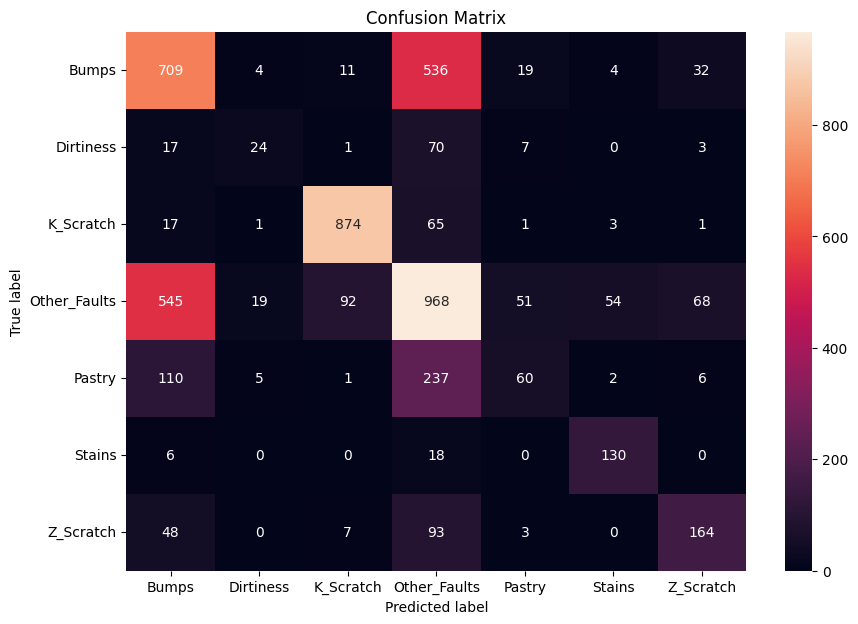

In [18]:
steel_inputs= steel_data[features].values
steel_labels = steel_data['Faults'].values
(training_inputs,
    testing_inputs,
    training_classes,
    testing_classes)= train_test_split(steel_inputs, steel_labels, test_size=0.25, random_state=1)
k=20
prev_score = 0
"""for i in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(training_inputs, training_classes)
    score = knn.score(testing_inputs, testing_classes)"""

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(training_inputs, training_classes)
class_pred = knn.predict(testing_inputs)
score = knn.score(testing_inputs, testing_classes)
report = classification_report(testing_classes, class_pred, target_names=class_labels)
print(score)
print(report)
cm = confusion_matrix(testing_classes, class_pred)
class_labels=np.unique(testing_classes)
# Create a DataFrame from the confusion matrix for easier plotting
cm_df = pandas.DataFrame(cm, index=class_labels, columns=class_labels)

# Plot the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, fmt='g')
plt.title("Confusion Matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


#### Using the balanced subset (SMOTE) with **K-NN**

In [19]:
k_max = 0
temp = 0
y_pred = []
for k in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(training_inputs_op, training_classes_op)
    temp_y_pred = knn.predict(testing_inputs_stratified)
    score = knn.score(testing_inputs_stratified, testing_classes_stratified)
    if(score > temp):
        temp = score
        k_max = k
        y_pred = temp_y_pred
print("Neighbours: ",k_max)
print("Score: ",temp)
print(classification_report(testing_classes, y_pred))

Neighbours:  2
Score:  0.5129767990562328
              precision    recall  f1-score   support

       Bumps       0.25      0.33      0.28      1315
   Dirtiness       0.02      0.05      0.03       122
   K_Scratch       0.21      0.23      0.22       962
Other_Faults       0.37      0.20      0.26      1797
      Pastry       0.09      0.09      0.09       421
      Stains       0.04      0.05      0.04       154
   Z_Scratch       0.07      0.09      0.08       315

    accuracy                           0.21      5086
   macro avg       0.15      0.15      0.14      5086
weighted avg       0.25      0.21      0.22      5086



#### Using the default subset split for the **RandomForest** model:

In [20]:
randomForest = RandomForestClassifier(random_state=1)
randomForest.fit(training_inputs, training_classes)
y_pred = randomForest.predict(testing_inputs)
print(classification_report(testing_classes, y_pred))
print(randomForest.score(testing_inputs, testing_classes))

              precision    recall  f1-score   support

       Bumps       0.55      0.50      0.52      1315
   Dirtiness       0.67      0.15      0.24       122
   K_Scratch       0.90      0.91      0.90       962
Other_Faults       0.51      0.66      0.57      1797
      Pastry       0.54      0.21      0.30       421
      Stains       0.73      0.76      0.75       154
   Z_Scratch       0.70      0.52      0.60       315

    accuracy                           0.61      5086
   macro avg       0.66      0.53      0.56      5086
weighted avg       0.62      0.61      0.60      5086

0.6097129374754228


#### Using the optimized subset (SMOTE) for the **RandomForest** model:

In [21]:
randomForest = RandomForestClassifier()
randomForest.fit(training_inputs_op, training_classes_op)
y_pred = randomForest.predict(testing_inputs_stratified)
print(classification_report(testing_classes_stratified, y_pred))
print(randomForest.score(testing_inputs_stratified, testing_classes_stratified))

              precision    recall  f1-score   support

       Bumps       0.55      0.55      0.55      1291
   Dirtiness       0.31      0.45      0.37       135
   K_Scratch       0.90      0.92      0.91       956
Other_Faults       0.55      0.46      0.50      1803
      Pastry       0.36      0.47      0.41       406
      Stains       0.73      0.94      0.82       160
   Z_Scratch       0.57      0.69      0.63       335

    accuracy                           0.60      5086
   macro avg       0.57      0.64      0.60      5086
weighted avg       0.60      0.60      0.60      5086

0.597915847424302


#### Using the **HistGradientBoosting** model:
This model benefits the dataset that have big amount of data (usually >= 10000), being more efficient and faster.

              precision    recall  f1-score   support

       Bumps       0.56      0.52      0.54      1315
   Dirtiness       0.60      0.25      0.36       122
   K_Scratch       0.90      0.92      0.91       962
Other_Faults       0.52      0.61      0.56      1797
      Pastry       0.54      0.28      0.37       421
      Stains       0.68      0.80      0.73       154
   Z_Scratch       0.62      0.67      0.65       315

    accuracy                           0.62      5086
   macro avg       0.63      0.58      0.59      5086
weighted avg       0.62      0.62      0.61      5086

0.6183641368462446


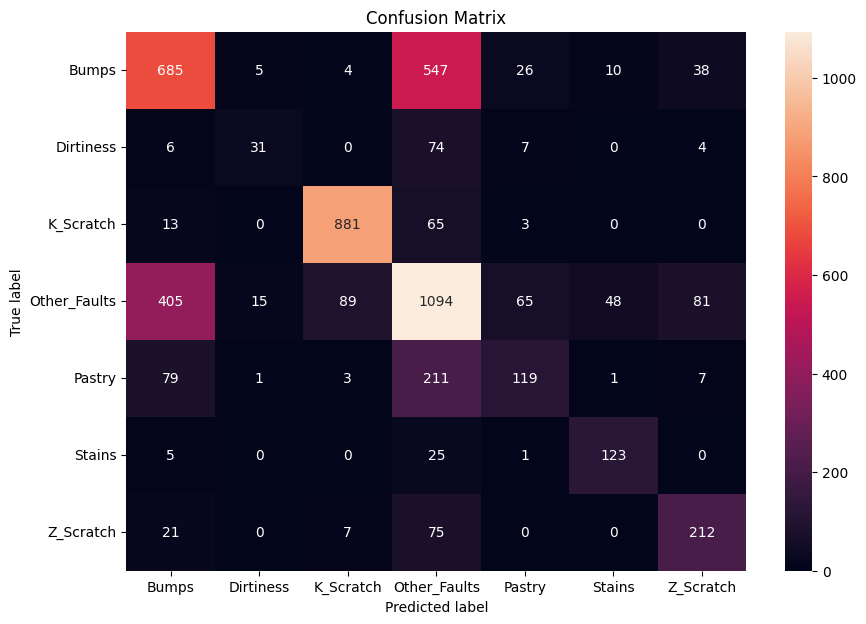

In [22]:
hist_gradient_boosting_classifier = HistGradientBoostingClassifier(max_iter=100)
clf = hist_gradient_boosting_classifier.fit(training_inputs, training_classes)
score = clf.score(testing_inputs, testing_classes)
y_pred = hist_gradient_boosting_classifier.predict(testing_inputs)
print(classification_report(testing_classes, y_pred))
print(hist_gradient_boosting_classifier.score(testing_inputs, testing_classes))
cm = confusion_matrix(testing_classes, y_pred)
class_labels=np.unique(testing_classes)
# Create a DataFrame from the confusion matrix for easier plotting
cm_df = pandas.DataFrame(cm, index=class_labels, columns=class_labels)

# Plot the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, fmt='g')
plt.title("Confusion Matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()



As expected, the score of the model was increased, by about 10% comparing to the first models we used.

In [23]:
gradient_boosting_params = {
    'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5],
    'max_leaf_nodes': [20,30,40],
    'categorical_features': [[9,10]],
}

hist_grid_search = grid_search = GridSearchCV(HistGradientBoostingClassifier(),
                           param_grid=gradient_boosting_params,
                           cv=StratifiedKFold(n_splits=10),
                           n_jobs=-1)

hist_grid_search.fit(steel_inputs, steel_labels)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=HistGradientBoostingClassifier(), n_jobs=-1,
             param_grid={'categorical_features': [[9, 10]],
                         'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5],
                         'max_leaf_nodes': [20, 30, 40]})

In [24]:
print('Best score: {}'.format(hist_grid_search.best_score_))
print('Best parameters: {}'.format(hist_grid_search.best_params_))

Best score: 0.6278455205003877
Best parameters: {'categorical_features': [9, 10], 'learning_rate': 0.05, 'max_leaf_nodes': 20}


#### Results
We compared the different models by their scores using box plot:

SMOTE
[0.49415003 0.48210599 0.47832072 0.49277357 0.49277357 0.47935306
 0.53012048]
[0.48279422 0.48726772 0.48554714 0.48141776 0.48382657 0.47969718
 0.53769363]
[0.51582932 0.52993806 0.51169993 0.51342051 0.52236752 0.5375086
 0.56592083]
[0.58981418 0.59669649 0.58637302 0.58981418 0.58981418 0.58981418
 0.67401033]
[0.57501721 0.58430833 0.56056435 0.58706125 0.57983482 0.57295251
 0.65266781]
[0.57536132 0.57226428 0.56538197 0.57983482 0.58052306 0.55092911
 0.65232358]
[0.43117688 0.44735031 0.44218858 0.45216793 0.44769443 0.43083276
 0.48812392]


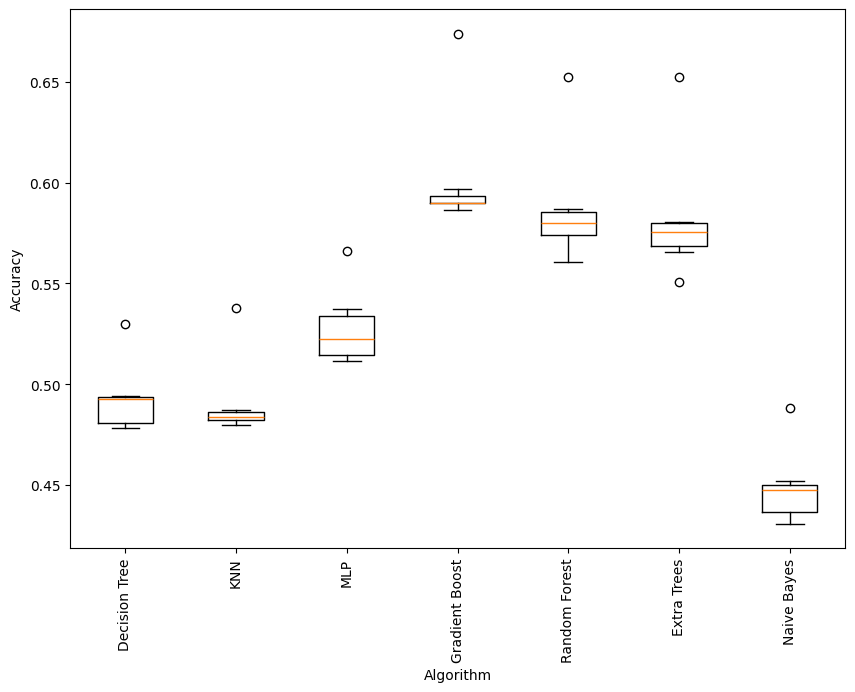

NO SMOTE
[0.49759119 0.50103235 0.4845148  0.50137646 0.49449415 0.50481762
 0.53907057]
[0.54094976 0.53372333 0.53716449 0.54232622 0.54989677 0.5395733
 0.60172117]
[0.59669649 0.59325533 0.59222299 0.59428768 0.57880248 0.58396421
 0.67401033]
[0.61114935 0.61424639 0.59738472 0.60667584 0.60805231 0.60289057
 0.6939759 ]
[0.59084652 0.60254646 0.57845836 0.60013765 0.59015829 0.57914659
 0.67917384]
[0.59084652 0.59394357 0.57949071 0.59944942 0.58671714 0.58121129
 0.66540448]
[0.44356504 0.4604267  0.45010323 0.46283551 0.45905024 0.44012388
 0.4929432 ]


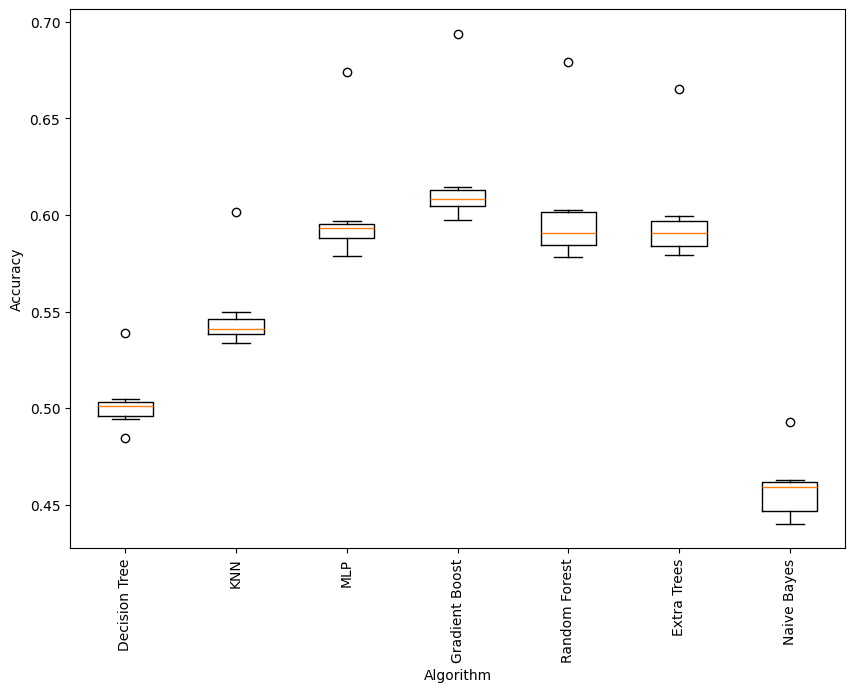

SMOTE no OTHER_FAULTS
[0.70202559 0.70788913 0.68710021 0.70293333 0.7248     0.70186667
 0.77653333]
[0.58688699 0.57515991 0.5858209  0.58933333 0.5824     0.59146667
 0.60106667]
[0.57995736 0.42270789 0.4738806  0.60693333 0.47893333 0.39893333
 0.47573333]
[0.79477612 0.79477612 0.78251599 0.80213333 0.80053333 0.78826667
 0.86826667]
[0.78198294 0.77985075 0.77452026 0.792      0.792      0.77066667
 0.85333333]
[0.78251599 0.77025586 0.75692964 0.77333333 0.784      0.7664
 0.82933333]
[0.61993603 0.59808102 0.60501066 0.60213333 0.62186667 0.5968
 0.63146667]


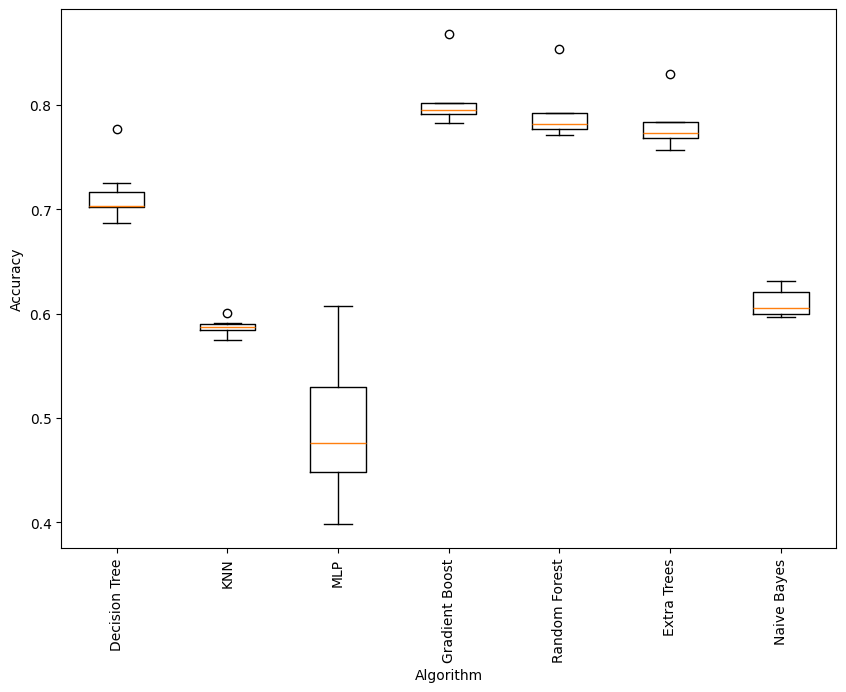

NO SMOTE no OTHER_FAULTS
[0.72014925 0.71855011 0.70842217 0.71786667 0.7248     0.72
 0.7824    ]
[0.67697228 0.67430704 0.68336887 0.6752     0.67093333 0.66613333
 0.69333333]
[0.51705757 0.54477612 0.54690832 0.4608     0.568      0.63893333
 0.6448    ]
[0.79744136 0.8054371  0.79744136 0.8112     0.81333333 0.79253333
 0.8736    ]
[0.78997868 0.79744136 0.78251599 0.80053333 0.79626667 0.784
 0.8656    ]
[0.78731343 0.7793177  0.77878465 0.78666667 0.79093333 0.77706667
 0.8528    ]
[0.67217484 0.641258   0.64978678 0.66773333 0.64906667 0.6624
 0.66453333]


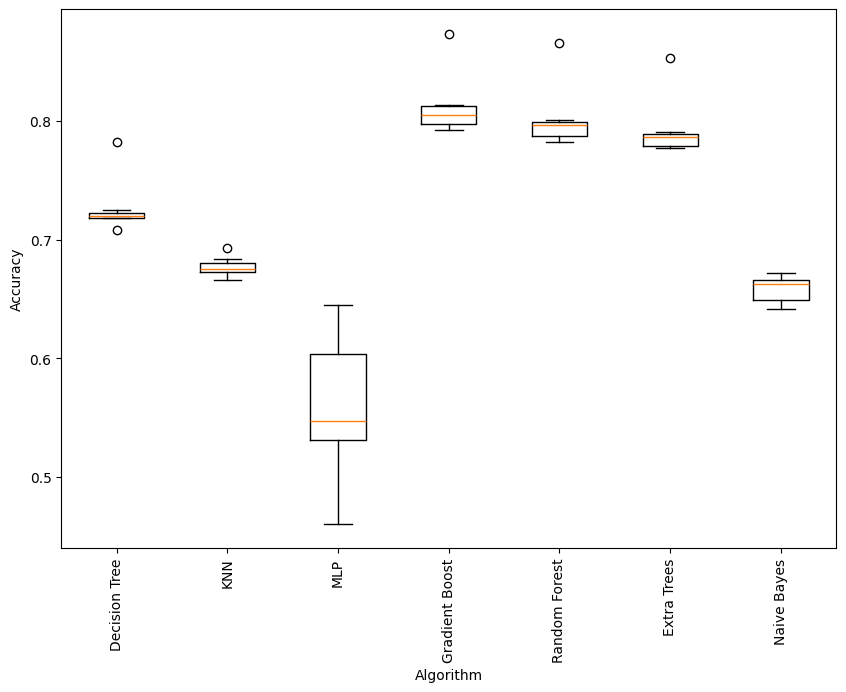

SMOTE no OUTLIERS
[0.48933242 0.50344116 0.49690296 0.49277357 0.48795595 0.48967653
 0.54664372]
[0.40984171 0.41018582 0.41878871 0.41156228 0.42807983 0.42050929
 0.416179  ]
[0.33620096 0.49242946 0.51273228 0.31865107 0.39883001 0.33654508
 0.35111876]
[0.59187887 0.59187887 0.58568479 0.59600826 0.59635237 0.59084652
 0.68812392]
[0.56985547 0.57398486 0.56228493 0.58671714 0.57501721 0.56469374
 0.65301205]
[0.55781142 0.55264969 0.55230557 0.56434962 0.56503785 0.54817619
 0.63407917]
[0.41775637 0.41156228 0.4163799  0.40846524 0.4053682  0.41431521
 0.44268503]


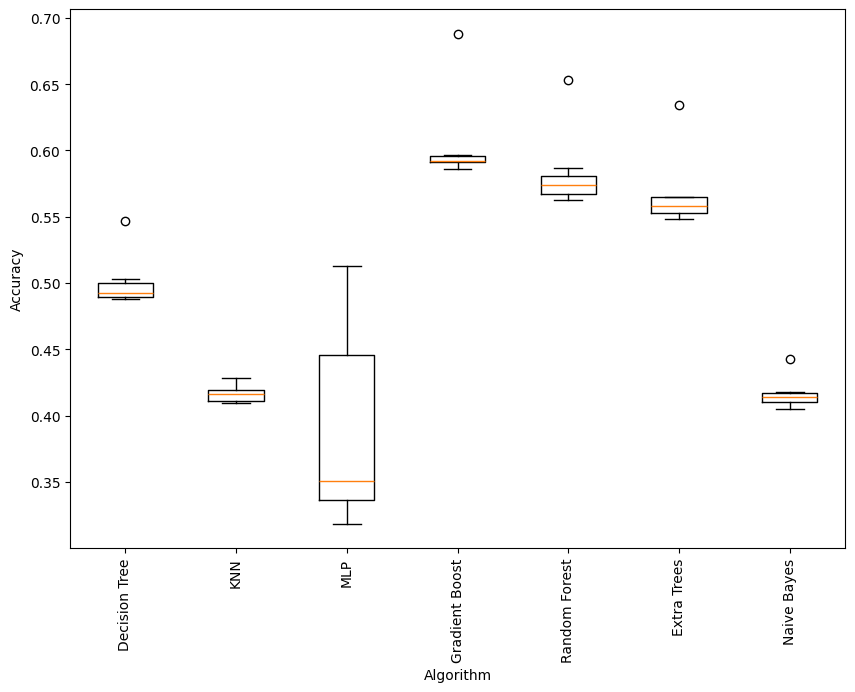

No SMOTE no OUTLIERS
[0.50309704 0.50550585 0.49105299 0.50172058 0.49793531 0.50412939
 0.53046472]
[0.48795595 0.47900895 0.48830007 0.49311769 0.49793531 0.48967653
 0.49466437]
[0.31968341 0.5044735  0.51445286 0.36097729 0.51135582 0.50172058
 0.43820998]
[0.60151411 0.6166552  0.59738472 0.610117   0.61114935 0.60942877
 0.69845095]
[0.59050241 0.60254646 0.57088782 0.6056435  0.58912595 0.58671714
 0.6777969 ]
[0.58602891 0.58499656 0.57639367 0.58568479 0.57639367 0.57777013
 0.65576592]
[0.45560908 0.44150034 0.440468   0.44700619 0.44115623 0.45388851
 0.46471601]


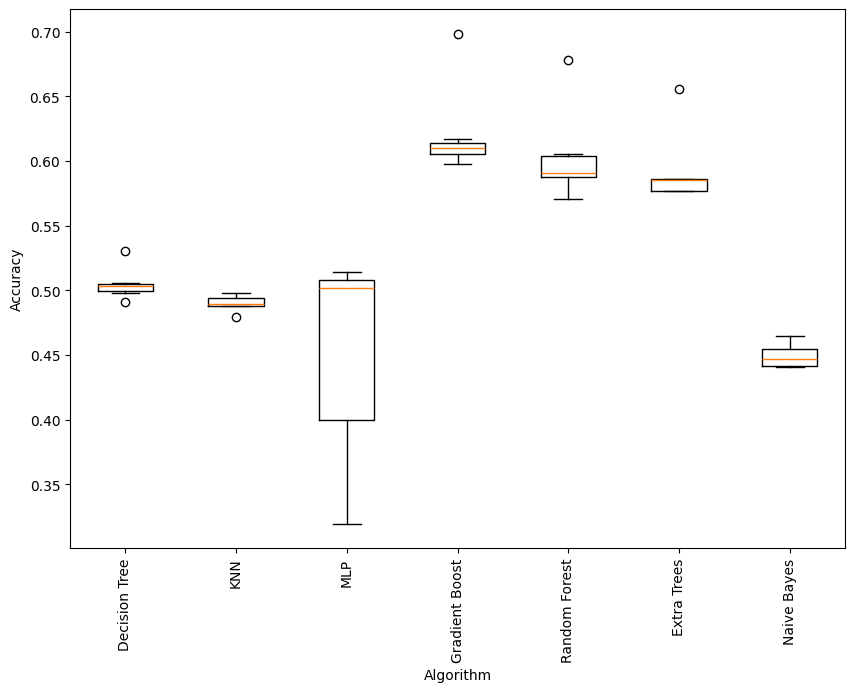

In [7]:
""" def get_second_max(list):
    mx = max(list[0], list[1]) 
    secondmax = min(list[0], list[1]) 
    n = len(list)
    for i in range(2,n): 
        if list[i] > mx: 
            secondmax = mx
            mx = list[i] 
        elif list[i] > secondmax and \
            mx != list[i]: 
            secondmax = list[i]
        elif mx == secondmax and \
            secondmax != list[i]:
            secondmax = list[i]
    return (mx, secondmax)

def get_sample_num(y):
    print(y)
    counts = dict(Counter(y))
    res = {}
    mx, smx = get_second_max(list(counts.values()))
    for label in all_target_labels:
        if counts[label] > smx:
            res[label] = mx
        else:
            res[label] = smx
    print(res)
    return res """


def plot_models(inputs, labels, smote):
    models = []
    models.append(("Decision Tree", DecisionTreeClassifier()))
    models.append(("KNN", KNeighborsClassifier()))
    models.append(("MLP", MLPClassifier()))
    #models.append(("SVM", SVC()))
    models.append(("Gradient Boost", HistGradientBoostingClassifier()))
    models.append(("Random Forest", RandomForestClassifier()))
    models.append(("Extra Trees", ExtraTreesClassifier()))
    models.append(("Naive Bayes", GaussianNB()))

    cv = StratifiedKFold(n_splits=7)
    scores = []

    for _, classifier in models:
        steps = []
        if smote:
            steps.append(('over', SMOTENC(categorical_features=[9])))
            #steps.append(('under', RandomUnderSampler()))
        steps.append(('model', classifier))

        score = cross_val_score(Pipeline(steps=steps), inputs, labels, scoring="accuracy", cv=cv, n_jobs=-1, error_score="raise")
        print(score)
        scores.append(score)
    
    plt.figure(figsize=(10,7))
    plt.boxplot(scores, labels=list(map(lambda elem: elem[0], models)))

    plt.xlabel('Algorithm')
    plt.ylabel('Accuracy')
    plt.xticks(rotation=90)

    plt.show()

print("SMOTE")
plot_models(steel_inputs, steel_labels, True)
print("NO SMOTE")
plot_models(steel_inputs, steel_labels, False)

print("SMOTE no OTHER_FAULTS")
plot_models(steel_inputs_no_others, steel_labels_no_others, True)
print("NO SMOTE no OTHER_FAULTS")
plot_models(steel_inputs_no_others, steel_labels_no_others, False)

print("SMOTE no OUTLIERS")
plot_models(steel_data_no_outliers_inputs, steel_data_no_outliers_labels, True)
print("No SMOTE no OUTLIERS")
plot_models(steel_data_no_outliers_inputs, steel_data_no_outliers_labels, False)